<a href="https://colab.research.google.com/github/jieun0441/XMC/blob/main/FMC_Code13_PE_and_SC_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
# Define the save directory
save_dir = "/content/drive/MyDrive/FMC_Data/Figures_PE_SC_indices"
os.makedirs(save_dir, exist_ok=True)

In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/FMC_Data/PE_and_SC_indices_Table/Seoul_ADMDONG_indices_combined.csv')

# Check the first few rows
df.head()

,ADMDONG_CD,PE3_Seoul,PE7_Seoul,SC1,SC2
0,11110515,0.259180,0.154843,19.764209,12.682711
1,11110530,0.519847,0.867687,15.432103,26.444967
2,11110540,0.130704,0.091754,8.050622,12.606470
3,11110550,0.133474,0.070045,19.036250,9.270658
4,11110560,0.145489,0.081985,19.939680,9.782003


In [5]:
df.columns

Index(['ADMDONG_CD', 'PE3_Seoul', 'PE7_Seoul', 'SC1', 'SC2'], dtype='object')

In [6]:
df = df.rename(columns={
    'PE3_Seoul': 'PE_Nonworking_Trip',
    'PE7_Seoul': 'PE_Working_Trip',
    'SC1': 'SC_Nonworking_Trip',
    'SC2': 'SC_Working_Trip'
})

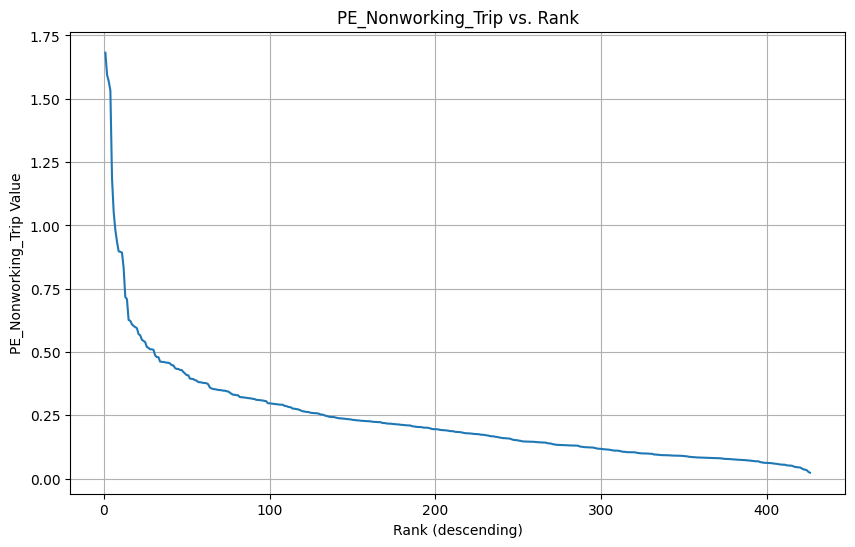

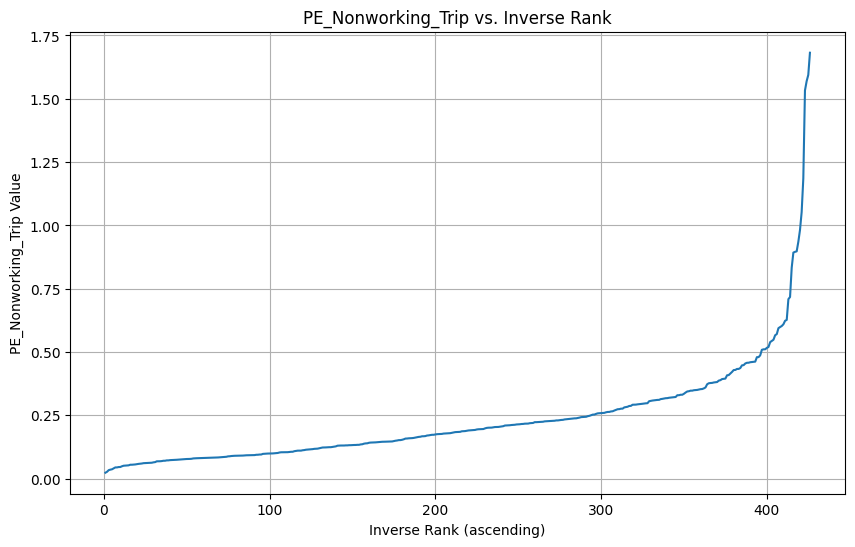

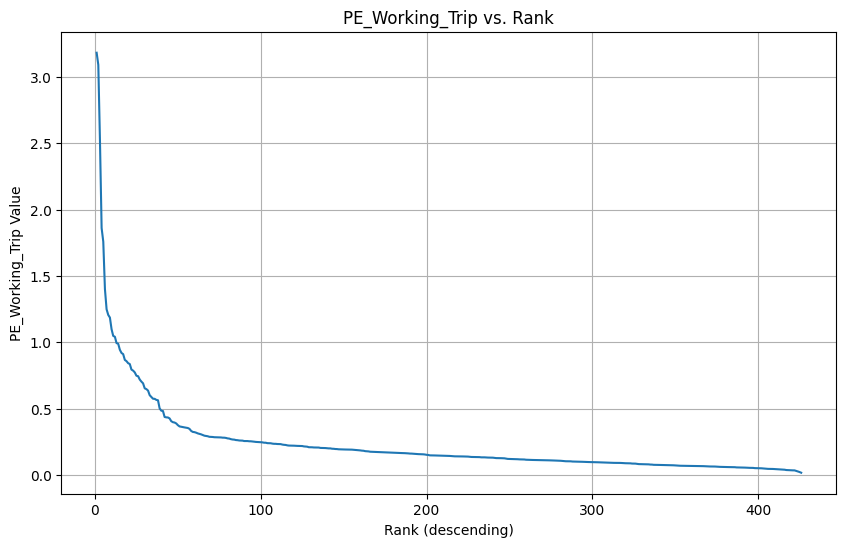

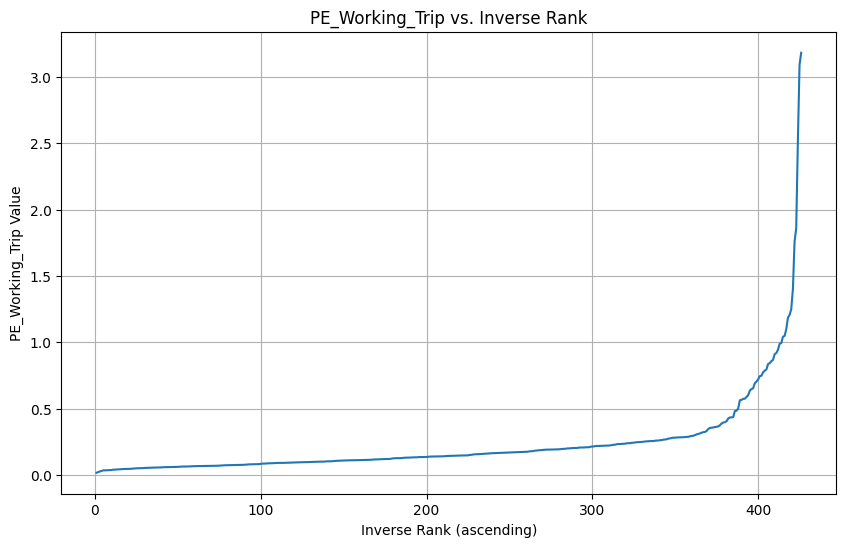

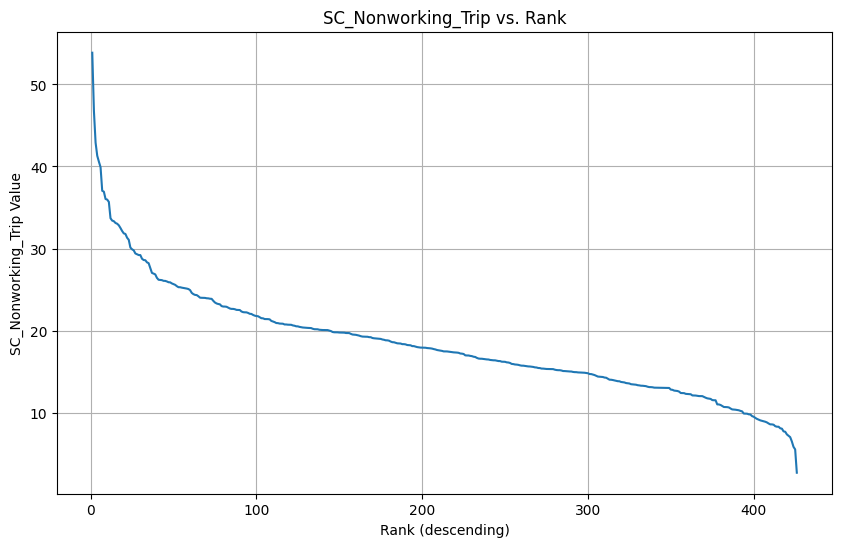

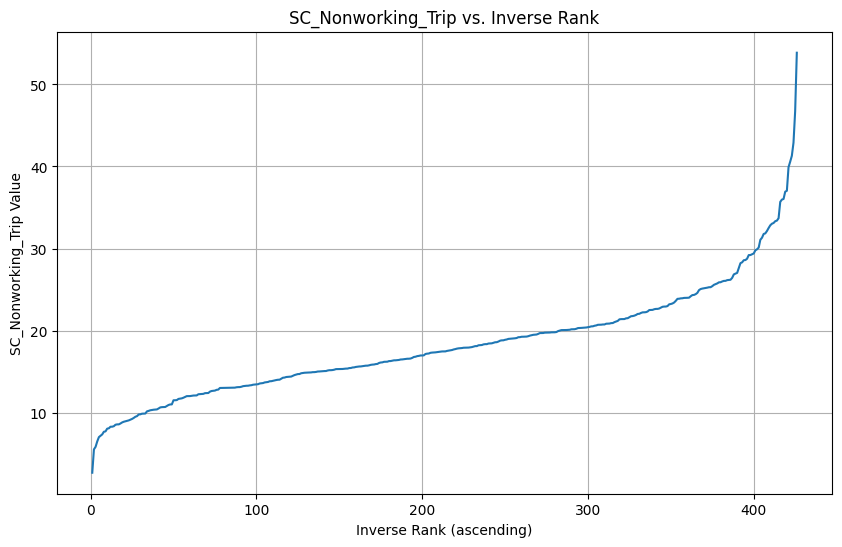

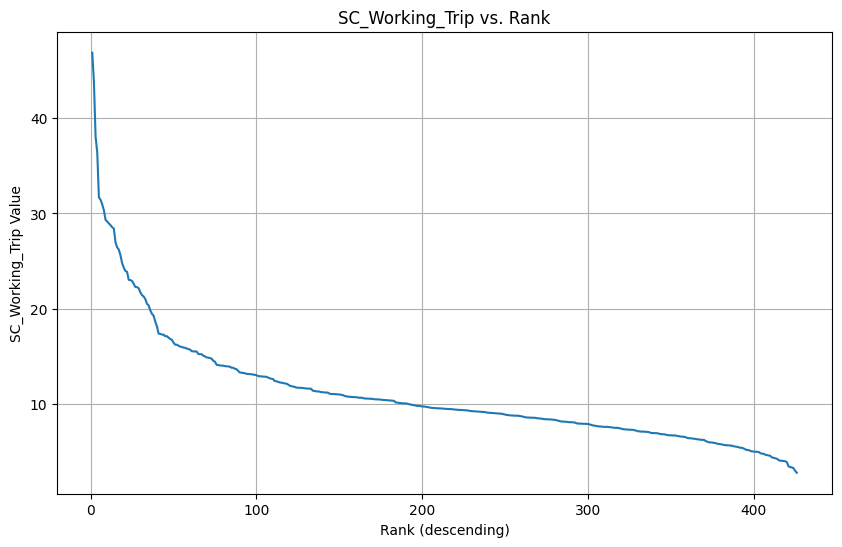

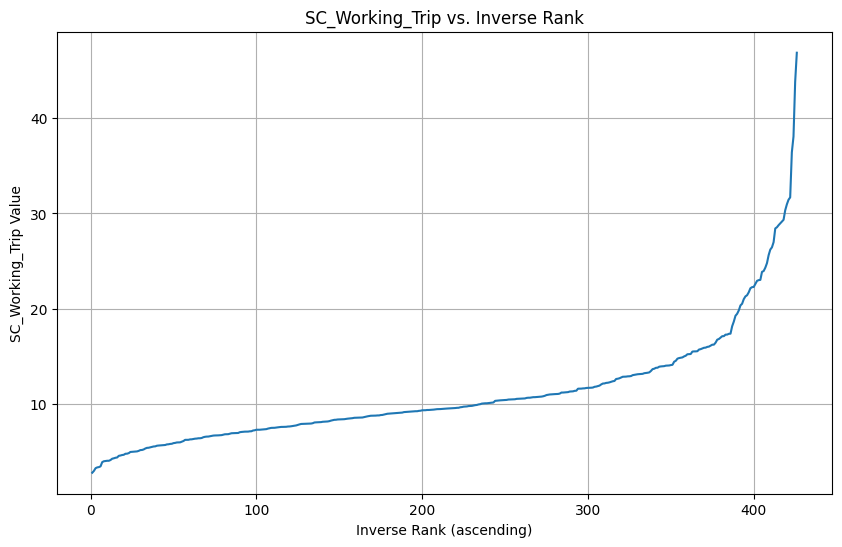

In [7]:
# List of indices
indices = ['PE_Nonworking_Trip',
    'PE_Working_Trip',
    'SC_Nonworking_Trip',
    'SC_Working_Trip']

# Function to plot index vs. rank and inverse rank
def plot_rank_curves(df, index_name):
    data = df[index_name]
    sorted_values = data.sort_values(ascending=False).reset_index(drop=True)
    rank = np.arange(1, len(sorted_values) + 1)
    inverse_rank = len(sorted_values) - rank + 1

    # Index vs. Rank
    plt.figure(figsize=(10, 6))
    plt.plot(rank, sorted_values)
    plt.xlabel('Rank (descending)')
    plt.ylabel(f'{index_name} Value')
    plt.title(f'{index_name} vs. Rank')
    plt.grid(True)

    plt.savefig(os.path.join(save_dir, f"{index_name}_rank.png")) # Save the plot as an image file

    plt.show()
    plt.close()  # Close the figure to free memory


    # Index vs. Inverse Rank
    plt.figure(figsize=(10, 6))
    plt.plot(inverse_rank, sorted_values)
    plt.xlabel('Inverse Rank (ascending)')
    plt.ylabel(f'{index_name} Value')
    plt.title(f'{index_name} vs. Inverse Rank')
    plt.grid(True)

    plt.savefig(os.path.join(save_dir, f"{index_name}_inverse_rank.png"))
    plt.show()
    plt.close()

# Plot for each index
for index in indices:
    plot_rank_curves(df, index)


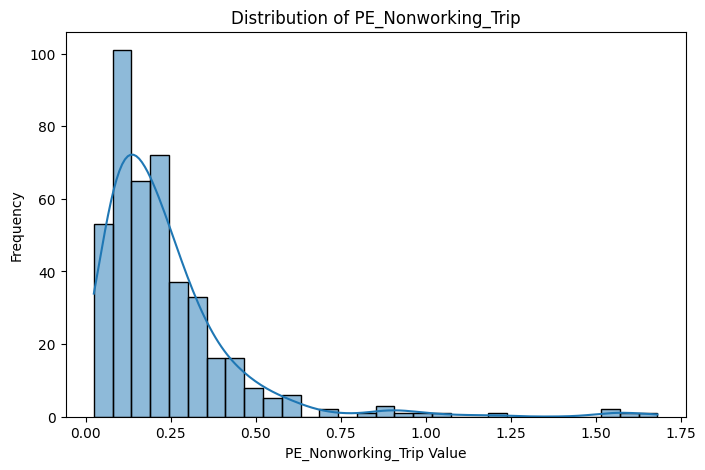

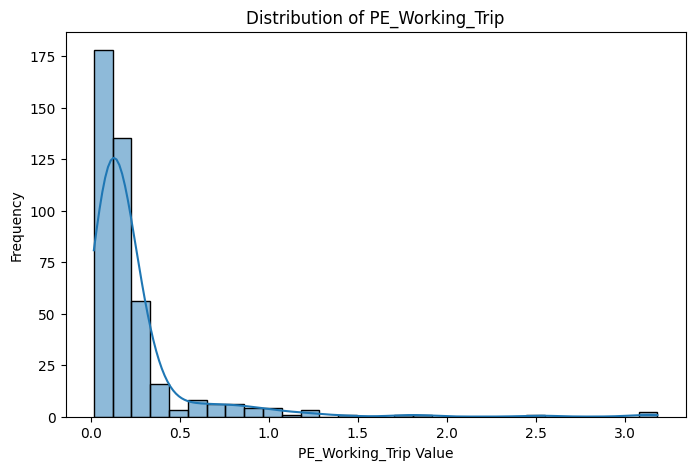

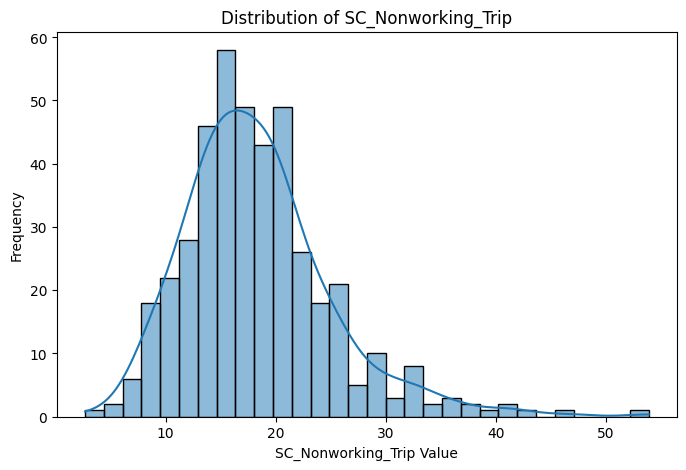

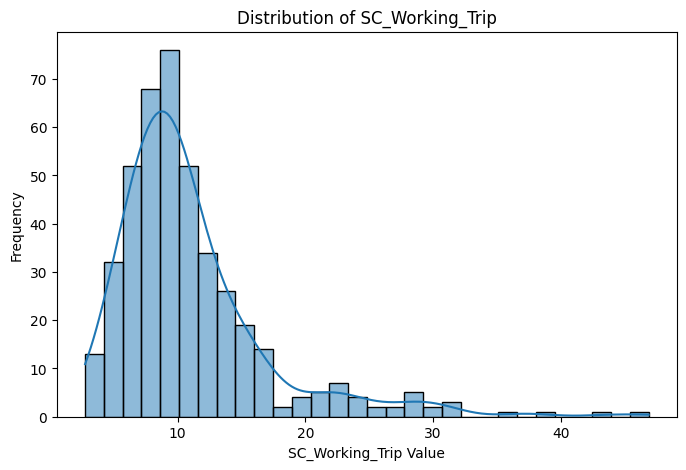

In [8]:
# Distribution plots
for index in indices:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[index], bins=30, kde=True)
    plt.title(f'Distribution of {index}')
    plt.xlabel(f'{index} Value')
    plt.ylabel('Frequency')

    plt.savefig(os.path.join(save_dir, f"{index}_distribution.png"))
    plt.show()
    plt.close()

In [9]:
# Summary statistics
summary_stats = df[indices].describe()
print("Summary Statistics:\n", summary_stats)
summary_stats.to_excel('/content/drive/MyDrive/FMC_Data/PE_and_SC_indices_Table/PE_and_SC_Indices_summary_statistics_2023_allyear.xlsx')

Summary Statistics:
        PE_Nonworking_Trip  PE_Working_Trip  SC_Nonworking_Trip  \
count          426.000000       426.000000          426.000000   
mean             0.234742         0.234742           18.314290   
std              0.213010         0.330917            6.746000   
min              0.023265         0.017451            2.679877   
25%              0.104047         0.089160           13.760468   
50%              0.184280         0.143999           17.463780   
75%              0.292007         0.236437           21.391484   
max              1.681946         3.182655           53.863408   

       SC_Working_Trip  
count       426.000000  
mean         11.027741  
std           6.069514  
min           2.756105  
25%           7.405888  
50%           9.475458  
75%          12.742799  
max          46.897063  
